In [24]:
import pandas as pd

# Load the dataset
file_path = 'heart_disease_uci.csv'
heart_disease_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
heart_disease_data.head()


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [25]:
# Checking for missing values and general data information
heart_disease_data.info(), heart_disease_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


(None,
 id            0
 age           0
 sex           0
 dataset       0
 cp            0
 trestbps     59
 chol         30
 fbs          90
 restecg       2
 thalch       55
 exang        55
 oldpeak      62
 slope       309
 ca          611
 thal        486
 num           0
 dtype: int64)

In [26]:
from sklearn.impute import SimpleImputer

# Dropping columns with high percentage of missing data
cleaned_data = heart_disease_data.drop(columns=['ca', 'thal'])

# Imputers for numeric and categorical data
numeric_imputer = SimpleImputer(strategy='median')
categorical_imputer = SimpleImputer(strategy='most_frequent')

# Columns to impute
numeric_columns = ['trestbps', 'chol', 'thalch', 'oldpeak']
categorical_columns = ['fbs', 'restecg', 'exang', 'slope']

# Applying imputation
cleaned_data[numeric_columns] = numeric_imputer.fit_transform(cleaned_data[numeric_columns])
cleaned_data[categorical_columns] = categorical_imputer.fit_transform(cleaned_data[categorical_columns])

# Check the dataset after imputation
cleaned_data.info(), cleaned_data.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  920 non-null    float64
 6   chol      920 non-null    float64
 7   fbs       920 non-null    object 
 8   restecg   920 non-null    object 
 9   thalch    920 non-null    float64
 10  exang     920 non-null    object 
 11  oldpeak   920 non-null    float64
 12  slope     920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 100.8+ KB


(None,
 id          0
 age         0
 sex         0
 dataset     0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalch      0
 exang       0
 oldpeak     0
 slope       0
 num         0
 dtype: int64)

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up the visualization environment
sns.set(style="whitegrid")

# EDA and Statistical Summary
# Calculating statistical summaries
stat_summary = cleaned_data.describe()



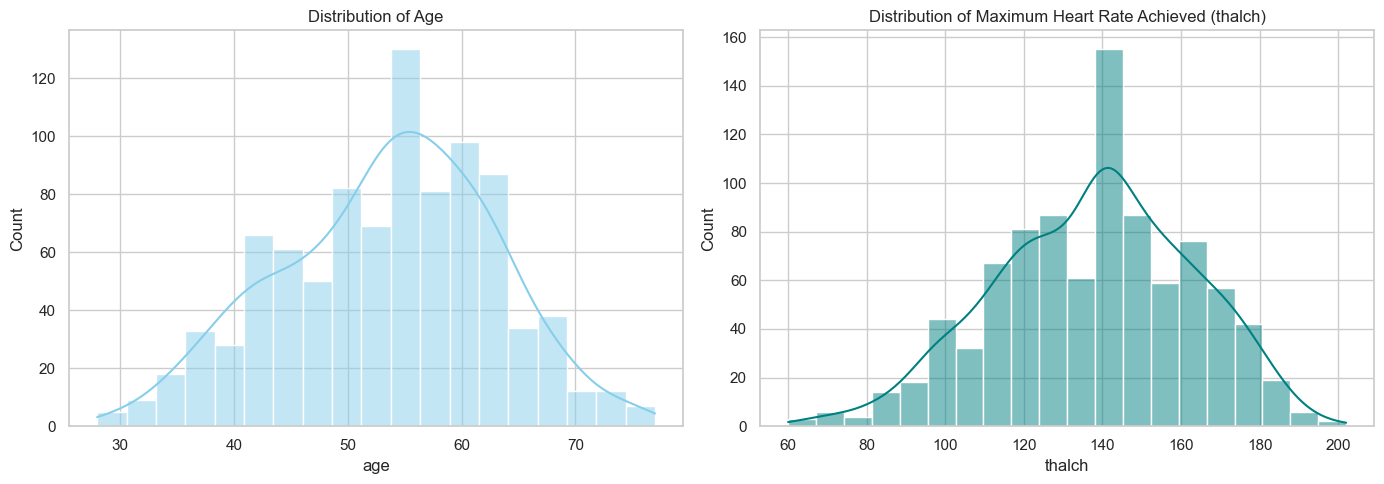

In [47]:
# Plotting histograms for numerical variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))  # Create a single row with two columns
sns.histplot(cleaned_data['age'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Age')
sns.histplot(cleaned_data['thalch'], kde=True, ax=axes[1], color='teal')
axes[1].set_title('Distribution of Maximum Heart Rate Achieved (thalch)')

plt.tight_layout()
plt.show()



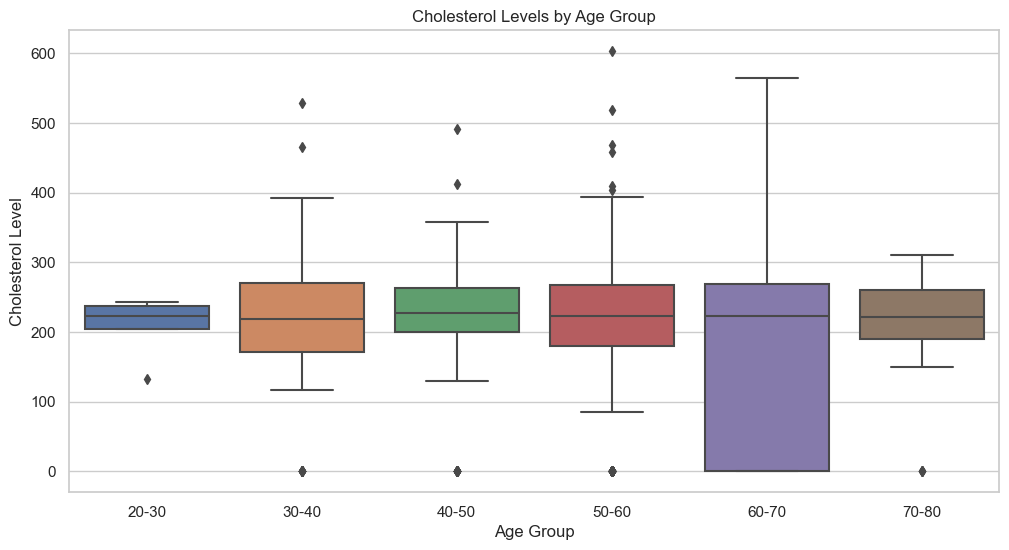

In [43]:
# Categorizing age into groups for better visualization
plot_data['Age Group'] = pd.cut(plot_data['age'], bins=[20, 30, 40, 50, 60, 70, 80], labels=['20-30', '30-40', '40-50', '50-60', '60-70', '70-80'])

# Creating a box plot for cholesterol levels across age groups
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age Group', y='chol', data=plot_data)
plt.title('Cholesterol Levels by Age Group')
plt.ylabel('Cholesterol Level')
plt.xlabel('Age Group')
plt.show()

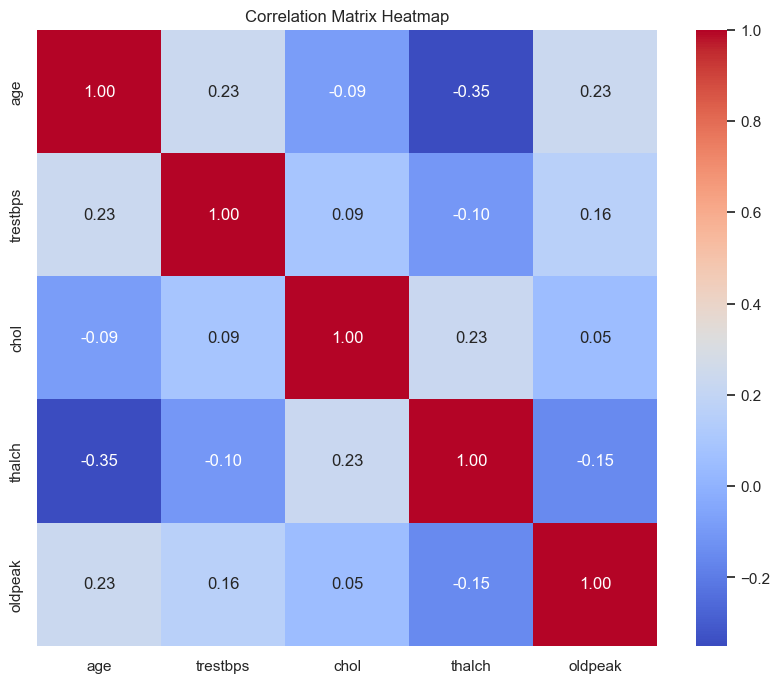

In [44]:
# Calculating the correlation matrix for numerical features
correlation_matrix = plot_data[numerical_features].corr()

# Creating a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
# Statistical measures of skewness and kurtosis
skewness = cleaned_data.skew()
kurtosis = cleaned_data.kurtosis()

(stat_summary, skewness, kurtosis)


C:\Users\dell\AppData\Local\Temp\ipykernel_1492\3684248225.py:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = cleaned_data.skew()
C:\Users\dell\AppData\Local\Temp\ipykernel_1492\3684248225.py:3: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = cleaned_data.kurtosis()


(               id         age    trestbps        chol      thalch     oldpeak  \
 count  920.000000  920.000000  920.000000  920.000000  920.000000  920.000000   
 mean   460.500000   53.510870  131.995652  199.908696  137.692391    0.853261   
 std    265.725422    9.424685   18.451300  109.040171   25.145235    1.058049   
 min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
 25%    230.750000   47.000000  120.000000  177.750000  120.000000    0.000000   
 50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
 75%    690.250000   60.000000  140.000000  267.000000  156.000000    1.500000   
 max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   
 
               num  
 count  920.000000  
 mean     0.995652  
 std      1.142693  
 min      0.000000  
 25%      0.000000  
 50%      1.000000  
 75%      2.000000  
 max      4.000000  ,
 id          0.000000
 age        -0.195994
 trestbps    0.242417
 cho

In [30]:
from sklearn.preprocessing import StandardScaler

# Selecting numerical columns for clustering
numerical_features = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

# Normalizing the numerical features
scaler = StandardScaler()
normalized_features = scaler.fit_transform(cleaned_data[numerical_features])

# Checking the mean and standard deviation of the normalized features
normalized_features_df = pd.DataFrame(normalized_features, columns=numerical_features)
normalized_features_df.describe()


,age,trestbps,chol,thalch,oldpeak
count,9.200000e+02,920.000000,9.200000e+02,9.200000e+02,9.200000e+02
mean,6.178632e-17,0.000000,-9.267949e-17,-4.016111e-16,-2.316987e-17
std,1.000544e+00,1.000544,1.000544e+00,1.000544e+00,1.000544e+00
min,-2.708286e+00,-7.157623,-1.834346e+00,-3.091427e+00,-3.265577e+00
25%,-6.912073e-01,-0.650479,-2.033264e-01,-7.039908e-01,-8.068863e-01
50%,5.192709e-02,-0.108217,2.118840e-01,9.182113e-02,-3.340612e-01
75%,6.888994e-01,0.434045,6.156245e-01,7.284707e-01,6.115890e-01
max,2.493654e+00,3.687618,3.698734e+00,2.558838e+00,5.056145e+00


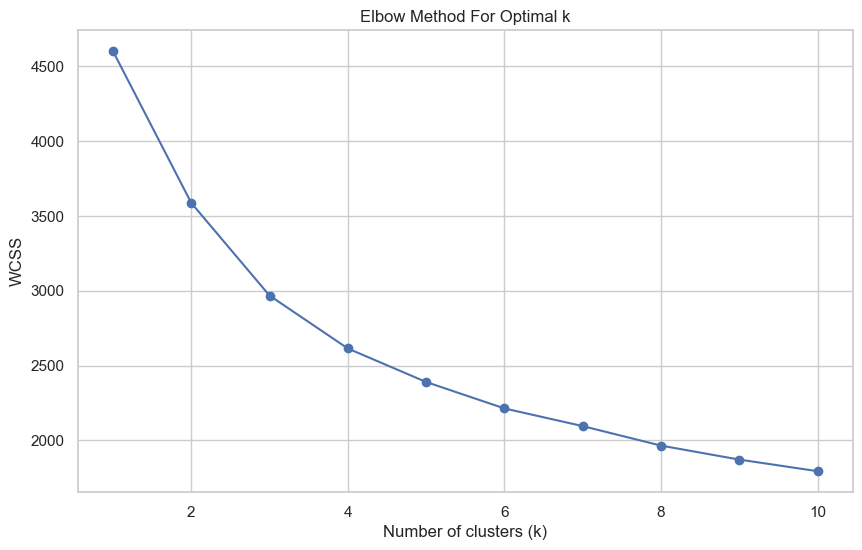

In [31]:
from sklearn.cluster import KMeans

# Calculate WCSS for different number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(normalized_features_df)
    wcss.append(kmeans.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


In [32]:
from sklearn.metrics import silhouette_score

# Calculating silhouette scores for k = 3 and k = 4
silhouette_scores = {}
for i in [3, 4]:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_features_df)
    score = silhouette_score(normalized_features_df, cluster_labels)
    silhouette_scores[i] = score

silhouette_scores


{3: 0.23247565145568788, 4: 0.2059885084808986}

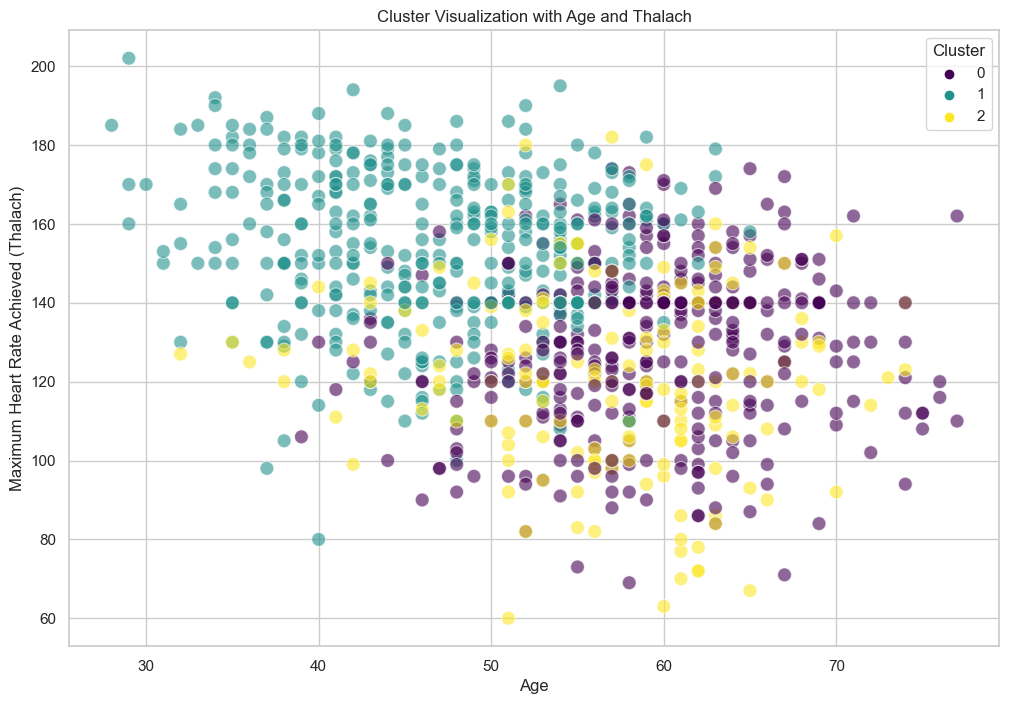

In [50]:
# Fitting k-means with k=3
kmeans_final = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels_final = kmeans_final.fit_predict(normalized_features_df)

# Adding cluster labels to the dataframe for plotting
plot_data = cleaned_data.copy()
plot_data['Cluster'] = cluster_labels_final

# Plotting clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='age', y='thalch', hue='Cluster', data=plot_data, palette='viridis', s=100, alpha=0.6)
plt.title('Cluster Visualization with Age and Thalach')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (Thalach)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


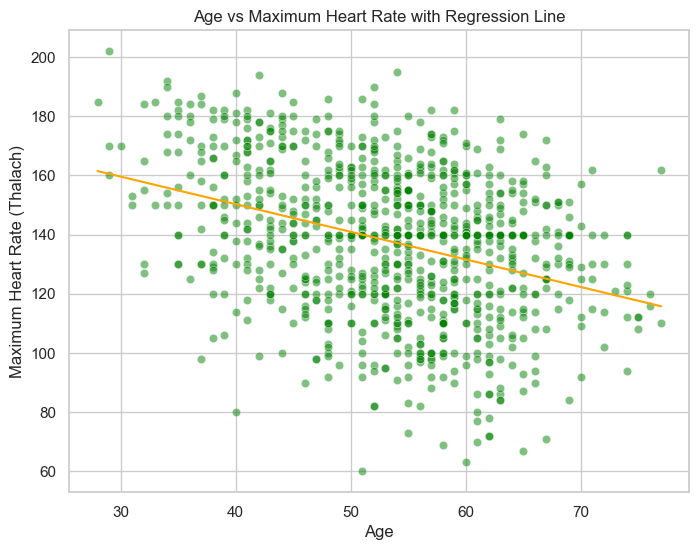

R-squared: 0.1223
Mean Squared Error: 554.3511


In [49]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Preparing data for regression analysis
x_age = sm.add_constant(plot_data['age'])  # adding a constant for the intercept

# Regression for Age vs Maximum Heart Rate
y_thalach = plot_data['thalch']
model_thalach = sm.OLS(y_thalach, x_age).fit()
plot_data['Thalach_Pred'] = model_thalach.predict(x_age)

# Plotting the regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalch', data=plot_data, color='green', alpha=0.5)
sns.lineplot(x='age', y='Thalach_Pred', data=plot_data, color='orange')
plt.title('Age vs Maximum Heart Rate with Regression Line')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (Thalach)')
plt.show()

# Calculating R-squared and Mean Squared Error
r_squared = model_thalach.rsquared
mse = mean_squared_error(plot_data['thalch'], plot_data['Thalach_Pred'])

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


